In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [3]:
# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: ",device)

Using device:  cuda


In [4]:
df = pd.read_csv("fashion-mnist_train.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


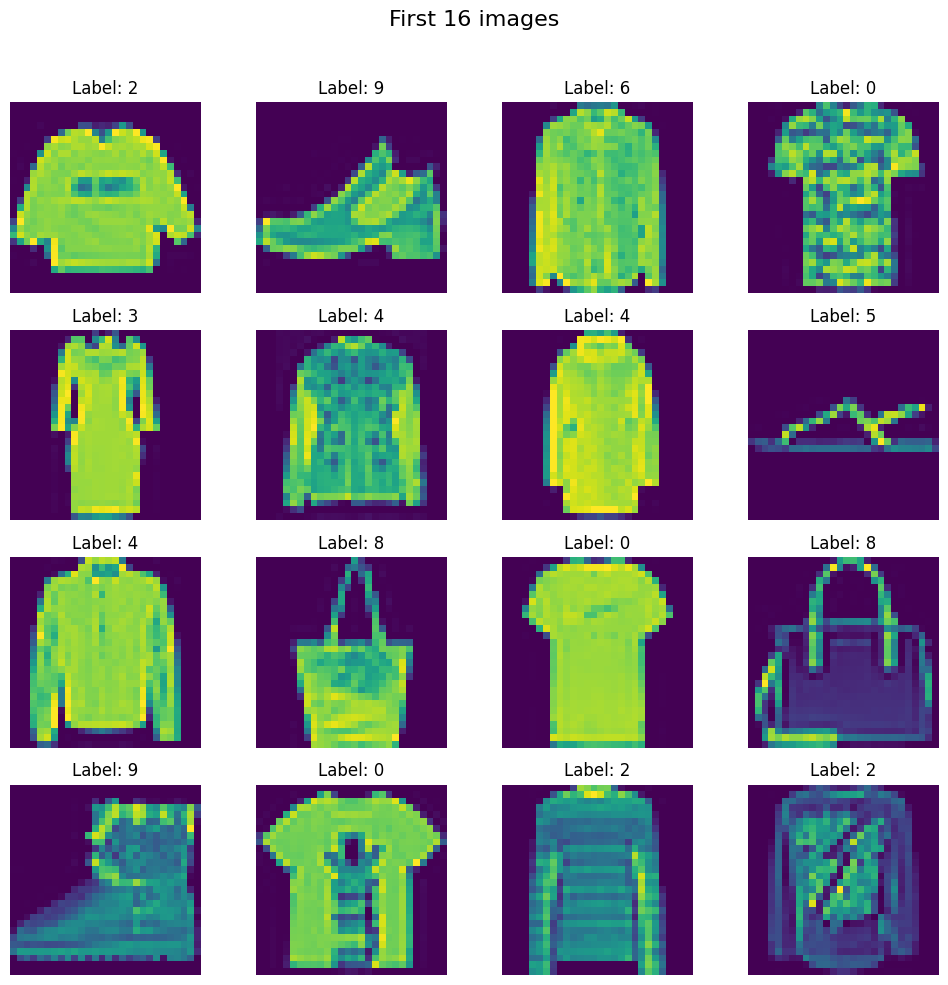

In [5]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
  img = df.iloc[i, 1:].values.reshape(28,28) # Reshape to 28x28
  ax.imshow(img)
  ax.axis("off") # Remove axis for a cleaner look
  ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0,0,1,0.96]) # Adjust the layout to fit the title
plt.show()


In [6]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Scaling features
# Because in a NN all values should be from 0-1
X_train = X_train/255.0
X_test = X_test/255.0

In [9]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
        0.        ]], shape=(48000, 784))

In [10]:
# create CustomerDataset Class
class CustomerDataset(Dataset):
  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)   # torch.long = int64 tensor

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]

In [11]:
# create train_dataset object
train_dataset = CustomerDataset(X_train, y_train)

In [12]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2275,
         0.5333, 0.0000, 0.0

In [13]:
len(train_dataset)

48000

In [14]:
# create test_dataset object
test_dataset = CustomerDataset(X_test, y_test)

In [15]:
len(test_dataset)

12000

In [16]:
class MyNN(nn.Module):

  def __init__(self, input_dim, output_dim, num_hidden_layers, neurons_per_layer, dropout_rate):

    super().__init__()

    layers = []

    for i in range(num_hidden_layers):

      layers.append(nn.Linear(input_dim, neurons_per_layer))
      layers.append(nn.BatchNorm1d(neurons_per_layer))
      layers.append(nn.ReLU())
      layers.append(nn.Dropout(dropout_rate))
      input_dim = neurons_per_layer

    layers.append(nn.Linear(neurons_per_layer, output_dim))

    self.model = nn.Sequential(*layers)  # unpack the layers -> give one by one; not all at once

  def forward(self, x):
    return self.model(x)


In [17]:
# objective function
def objective(trial):

  # next hyperparameter values from the search space
  num_hidden_layers = trial.suggest_int("num_hidden_layers",1,5)
  neurons_per_layer = trial.suggest_int("neurons_per_layer",16,128, step=8)
  epochs = trial.suggest_int("epochs",10,50, step=10)
  learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
  dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5, step=0.5)
  batch_size = trial.suggest_categorical("batch_size", [16,32,34,128])
  optimizer_name = trial.suggest_categorical("optimizer",["Adam","SGD","RMSprop"])
  weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-3, log=True)
                                        

  # create train and test loader
  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

  # model initialse
  input_dim = 784  #input neurons
  output_dim = 10  #output neurons

  model = MyNN(input_dim, output_dim, num_hidden_layers, neurons_per_layer, dropout_rate)
  model = model.to(device)

  # optimizer selection
  criterion = nn.CrossEntropyLoss()

  if optimizer_name == 'Adam':
    optimizer = optim.Adam(model.parameters(), lr = learning_rate, weight_decay=weight_decay)
  elif optimizer_name == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr = learning_rate, weight_decay=weight_decay)
  else:
    optimizer = optim.RMSprop(model.parameters(), lr = learning_rate, weight_decay=weight_decay)

  # training loop
  # training loop
  for epoch in range(epochs):

    total_epoch_loss = 0.0

    for batch_features, batch_labels in train_loader:

      # move to gpu
      batch_features = batch_features.to(device)
      batch_labels = batch_labels.to(device)

      # forward pass
      outputs = model(batch_features)

      # calculate loss
      loss = criterion(outputs, batch_labels)

      # backward pass
      optimizer.zero_grad()
      loss.backward()
 
      # update grads
      optimizer.step()

      total_epoch_loss = total_epoch_loss + loss.item()

    avg_loss = total_epoch_loss/len(train_loader)
    print(f"Epoch: {epoch+1}, Loss: {avg_loss:.4f}")

  # evaluation
  model.eval()  # --> sets model to evaluation mode, swtich off dropout and BatchNorm

  total = 0
  correct = 0

  with torch.no_grad():
    for batch_features, batch_labels in test_loader:

      # move to gpu
      batch_features = batch_features.to(device)
      batch_labels = batch_labels.to(device)

      outputs = model(batch_features)

      _, predicted = torch.max(outputs, 1)   # here we picked the class with maximum probability given by softmax
      # _ means: ignore the first return (values)

      total = total + batch_labels.shape[0]
      correct = correct + (predicted == batch_labels).sum().item()

  accuracy = correct/total
  return accuracy


In [18]:
import optuna

study = optuna.create_study(direction='maximize')

c:\my_PyTorch\env1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2026-02-07 13:47:50,907] A new study created in memory with name: no-name-76096e2e-d0f0-4058-a29f-baa9774d0dc2


In [19]:
study.optimize(objective, n_trials=10)

c:\my_PyTorch\env1\Lib\site-packages\optuna\distributions.py:671: UserWarning: The distribution is specified by [0.1, 0.5] and step=0.5, but the range is not divisible by `step`. It will be replaced with [0.1, 0.1].
  optuna_warn(


Epoch: 1, Loss: 1.9838
Epoch: 2, Loss: 1.5609
Epoch: 3, Loss: 1.2684
Epoch: 4, Loss: 1.0746
Epoch: 5, Loss: 0.9611
Epoch: 6, Loss: 0.8816
Epoch: 7, Loss: 0.8342
Epoch: 8, Loss: 0.8052
Epoch: 9, Loss: 0.7727
Epoch: 10, Loss: 0.7565
Epoch: 11, Loss: 0.7375
Epoch: 12, Loss: 0.7261
Epoch: 13, Loss: 0.7160
Epoch: 14, Loss: 0.6977
Epoch: 15, Loss: 0.6859
Epoch: 16, Loss: 0.6852
Epoch: 17, Loss: 0.6689
Epoch: 18, Loss: 0.6606
Epoch: 19, Loss: 0.6574
Epoch: 20, Loss: 0.6502
Epoch: 21, Loss: 0.6416
Epoch: 22, Loss: 0.6372
Epoch: 23, Loss: 0.6341
Epoch: 24, Loss: 0.6234
Epoch: 25, Loss: 0.6191
Epoch: 26, Loss: 0.6172
Epoch: 27, Loss: 0.6056
Epoch: 28, Loss: 0.6060
Epoch: 29, Loss: 0.5945
Epoch: 30, Loss: 0.5947
Epoch: 31, Loss: 0.5964
Epoch: 32, Loss: 0.5921
Epoch: 33, Loss: 0.5892
Epoch: 34, Loss: 0.5834
Epoch: 35, Loss: 0.5836
Epoch: 36, Loss: 0.5768
Epoch: 37, Loss: 0.5769
Epoch: 38, Loss: 0.5749
Epoch: 39, Loss: 0.5650
Epoch: 40, Loss: 0.5718
Epoch: 41, Loss: 0.5617
Epoch: 42, Loss: 0.5636
E

[I 2026-02-07 13:57:56,571] Trial 0 finished with value: 0.8650833333333333 and parameters: {'num_hidden_layers': 5, 'neurons_per_layer': 32, 'epochs': 50, 'learning_rate': 2.250835088695625e-05, 'dropout_rate': 0.1, 'batch_size': 16, 'optimizer': 'RMSprop', 'weight_decay': 0.0002856020892507081}. Best is trial 0 with value: 0.8650833333333333.
c:\my_PyTorch\env1\Lib\site-packages\optuna\distributions.py:671: UserWarning: The distribution is specified by [0.1, 0.5] and step=0.5, but the range is not divisible by `step`. It will be replaced with [0.1, 0.1].
  optuna_warn(


Epoch: 1, Loss: 1.2177
Epoch: 2, Loss: 1.2444
Epoch: 3, Loss: 1.2681
Epoch: 4, Loss: 1.2582
Epoch: 5, Loss: 1.2738
Epoch: 6, Loss: 1.2718
Epoch: 7, Loss: 1.2957
Epoch: 8, Loss: 1.2984
Epoch: 9, Loss: 1.3104
Epoch: 10, Loss: 1.3383
Epoch: 11, Loss: 1.3047
Epoch: 12, Loss: 1.3229
Epoch: 13, Loss: 1.3168
Epoch: 14, Loss: 1.3130
Epoch: 15, Loss: 1.3204
Epoch: 16, Loss: 1.3157
Epoch: 17, Loss: 1.3447
Epoch: 18, Loss: 1.3365
Epoch: 19, Loss: 1.3290
Epoch: 20, Loss: 1.3539
Epoch: 21, Loss: 1.3640
Epoch: 22, Loss: 1.3623
Epoch: 23, Loss: 1.3540
Epoch: 24, Loss: 1.3329
Epoch: 25, Loss: 1.3429
Epoch: 26, Loss: 1.3390
Epoch: 27, Loss: 1.3454
Epoch: 28, Loss: 1.3397
Epoch: 29, Loss: 1.3484
Epoch: 30, Loss: 1.3637
Epoch: 31, Loss: 1.3572
Epoch: 32, Loss: 1.3567
Epoch: 33, Loss: 1.3547
Epoch: 34, Loss: 1.3564
Epoch: 35, Loss: 1.3403
Epoch: 36, Loss: 1.3424
Epoch: 37, Loss: 1.3362
Epoch: 38, Loss: 1.3301
Epoch: 39, Loss: 1.3702
Epoch: 40, Loss: 1.3632
Epoch: 41, Loss: 1.3413
Epoch: 42, Loss: 1.3702
E

[I 2026-02-07 14:01:44,288] Trial 1 finished with value: 0.39608333333333334 and parameters: {'num_hidden_layers': 3, 'neurons_per_layer': 56, 'epochs': 50, 'learning_rate': 0.09385031296339427, 'dropout_rate': 0.1, 'batch_size': 34, 'optimizer': 'Adam', 'weight_decay': 0.0008750301318507801}. Best is trial 0 with value: 0.8650833333333333.


Epoch: 1, Loss: 0.7551
Epoch: 2, Loss: 0.5037
Epoch: 3, Loss: 0.4564
Epoch: 4, Loss: 0.4235
Epoch: 5, Loss: 0.3986
Epoch: 6, Loss: 0.3853
Epoch: 7, Loss: 0.3669
Epoch: 8, Loss: 0.3580
Epoch: 9, Loss: 0.3492
Epoch: 10, Loss: 0.3388
Epoch: 11, Loss: 0.3309
Epoch: 12, Loss: 0.3219
Epoch: 13, Loss: 0.3173
Epoch: 14, Loss: 0.3101
Epoch: 15, Loss: 0.3033
Epoch: 16, Loss: 0.2973
Epoch: 17, Loss: 0.2917
Epoch: 18, Loss: 0.2903
Epoch: 19, Loss: 0.2828
Epoch: 20, Loss: 0.2780
Epoch: 21, Loss: 0.2756
Epoch: 22, Loss: 0.2692
Epoch: 23, Loss: 0.2694
Epoch: 24, Loss: 0.2649
Epoch: 25, Loss: 0.2590
Epoch: 26, Loss: 0.2551
Epoch: 27, Loss: 0.2514
Epoch: 28, Loss: 0.2514
Epoch: 29, Loss: 0.2479
Epoch: 30, Loss: 0.2425
Epoch: 31, Loss: 0.2384
Epoch: 32, Loss: 0.2363
Epoch: 33, Loss: 0.2358
Epoch: 34, Loss: 0.2330
Epoch: 35, Loss: 0.2296
Epoch: 36, Loss: 0.2298
Epoch: 37, Loss: 0.2239
Epoch: 38, Loss: 0.2195
Epoch: 39, Loss: 0.2202
Epoch: 40, Loss: 0.2207


[I 2026-02-07 14:05:26,289] Trial 2 finished with value: 0.8925833333333333 and parameters: {'num_hidden_layers': 5, 'neurons_per_layer': 112, 'epochs': 40, 'learning_rate': 0.00011041576879330353, 'dropout_rate': 0.1, 'batch_size': 34, 'optimizer': 'RMSprop', 'weight_decay': 5.000361598167098e-05}. Best is trial 2 with value: 0.8925833333333333.


Epoch: 1, Loss: 2.3775
Epoch: 2, Loss: 2.3361
Epoch: 3, Loss: 2.3024
Epoch: 4, Loss: 2.2769
Epoch: 5, Loss: 2.2563
Epoch: 6, Loss: 2.2344
Epoch: 7, Loss: 2.2166
Epoch: 8, Loss: 2.1954
Epoch: 9, Loss: 2.1845
Epoch: 10, Loss: 2.1667
Epoch: 11, Loss: 2.1511
Epoch: 12, Loss: 2.1385
Epoch: 13, Loss: 2.1246
Epoch: 14, Loss: 2.1087
Epoch: 15, Loss: 2.0976
Epoch: 16, Loss: 2.0873
Epoch: 17, Loss: 2.0762
Epoch: 18, Loss: 2.0650
Epoch: 19, Loss: 2.0521
Epoch: 20, Loss: 2.0393
Epoch: 21, Loss: 2.0324
Epoch: 22, Loss: 2.0192
Epoch: 23, Loss: 2.0107
Epoch: 24, Loss: 1.9979
Epoch: 25, Loss: 1.9906
Epoch: 26, Loss: 1.9824
Epoch: 27, Loss: 1.9744
Epoch: 28, Loss: 1.9623
Epoch: 29, Loss: 1.9552
Epoch: 30, Loss: 1.9453
Epoch: 31, Loss: 1.9375
Epoch: 32, Loss: 1.9289
Epoch: 33, Loss: 1.9211
Epoch: 34, Loss: 1.9129
Epoch: 35, Loss: 1.9040
Epoch: 36, Loss: 1.8944
Epoch: 37, Loss: 1.8893
Epoch: 38, Loss: 1.8785
Epoch: 39, Loss: 1.8732
Epoch: 40, Loss: 1.8652


[I 2026-02-07 14:06:54,748] Trial 3 finished with value: 0.62475 and parameters: {'num_hidden_layers': 5, 'neurons_per_layer': 32, 'epochs': 40, 'learning_rate': 4.676261973087601e-05, 'dropout_rate': 0.1, 'batch_size': 128, 'optimizer': 'SGD', 'weight_decay': 0.00025525480354541576}. Best is trial 2 with value: 0.8925833333333333.


Epoch: 1, Loss: 0.6824
Epoch: 2, Loss: 0.4587
Epoch: 3, Loss: 0.4114
Epoch: 4, Loss: 0.3817
Epoch: 5, Loss: 0.3624
Epoch: 6, Loss: 0.3459
Epoch: 7, Loss: 0.3310
Epoch: 8, Loss: 0.3221
Epoch: 9, Loss: 0.3129
Epoch: 10, Loss: 0.3040


[I 2026-02-07 14:07:52,436] Trial 4 finished with value: 0.8891666666666667 and parameters: {'num_hidden_layers': 4, 'neurons_per_layer': 128, 'epochs': 10, 'learning_rate': 0.00019229540602791625, 'dropout_rate': 0.1, 'batch_size': 32, 'optimizer': 'Adam', 'weight_decay': 2.4011376340291678e-05}. Best is trial 2 with value: 0.8925833333333333.


Epoch: 1, Loss: 0.7654
Epoch: 2, Loss: 0.6139
Epoch: 3, Loss: 0.5766
Epoch: 4, Loss: 0.5642
Epoch: 5, Loss: 0.5490
Epoch: 6, Loss: 0.5361
Epoch: 7, Loss: 0.5287
Epoch: 8, Loss: 0.5169
Epoch: 9, Loss: 0.5142
Epoch: 10, Loss: 0.5057
Epoch: 11, Loss: 0.5054
Epoch: 12, Loss: 0.5063
Epoch: 13, Loss: 0.5048
Epoch: 14, Loss: 0.5060
Epoch: 15, Loss: 0.5073
Epoch: 16, Loss: 0.4961
Epoch: 17, Loss: 0.4935
Epoch: 18, Loss: 0.4949
Epoch: 19, Loss: 0.4931
Epoch: 20, Loss: 0.4938
Epoch: 21, Loss: 0.4924
Epoch: 22, Loss: 0.4914
Epoch: 23, Loss: 0.4913
Epoch: 24, Loss: 0.4873
Epoch: 25, Loss: 0.4934
Epoch: 26, Loss: 0.4868
Epoch: 27, Loss: 0.4893
Epoch: 28, Loss: 0.4845
Epoch: 29, Loss: 0.4886
Epoch: 30, Loss: 0.4825


[I 2026-02-07 14:13:58,463] Trial 5 finished with value: 0.852 and parameters: {'num_hidden_layers': 4, 'neurons_per_layer': 24, 'epochs': 30, 'learning_rate': 0.005239424353101701, 'dropout_rate': 0.1, 'batch_size': 32, 'optimizer': 'Adam', 'weight_decay': 3.0533258405504494e-05}. Best is trial 2 with value: 0.8925833333333333.


Epoch: 1, Loss: 0.7638
Epoch: 2, Loss: 0.4737
Epoch: 3, Loss: 0.4140
Epoch: 4, Loss: 0.3822
Epoch: 5, Loss: 0.3602
Epoch: 6, Loss: 0.3378
Epoch: 7, Loss: 0.3259
Epoch: 8, Loss: 0.3166
Epoch: 9, Loss: 0.3053
Epoch: 10, Loss: 0.2940
Epoch: 11, Loss: 0.2855
Epoch: 12, Loss: 0.2791
Epoch: 13, Loss: 0.2688
Epoch: 14, Loss: 0.2655
Epoch: 15, Loss: 0.2578
Epoch: 16, Loss: 0.2519
Epoch: 17, Loss: 0.2483
Epoch: 18, Loss: 0.2407
Epoch: 19, Loss: 0.2327
Epoch: 20, Loss: 0.2304
Epoch: 21, Loss: 0.2280
Epoch: 22, Loss: 0.2216
Epoch: 23, Loss: 0.2182
Epoch: 24, Loss: 0.2162
Epoch: 25, Loss: 0.2104
Epoch: 26, Loss: 0.2075
Epoch: 27, Loss: 0.2048
Epoch: 28, Loss: 0.2007
Epoch: 29, Loss: 0.1949
Epoch: 30, Loss: 0.1960


[I 2026-02-07 14:19:59,014] Trial 6 finished with value: 0.8910833333333333 and parameters: {'num_hidden_layers': 2, 'neurons_per_layer': 128, 'epochs': 30, 'learning_rate': 8.155362619263612e-05, 'dropout_rate': 0.1, 'batch_size': 32, 'optimizer': 'Adam', 'weight_decay': 2.9295084976267162e-05}. Best is trial 2 with value: 0.8925833333333333.


Epoch: 1, Loss: 1.0736
Epoch: 2, Loss: 0.6177
Epoch: 3, Loss: 0.5203
Epoch: 4, Loss: 0.4770
Epoch: 5, Loss: 0.4492
Epoch: 6, Loss: 0.4323
Epoch: 7, Loss: 0.4147
Epoch: 8, Loss: 0.4025
Epoch: 9, Loss: 0.3934
Epoch: 10, Loss: 0.3797
Epoch: 11, Loss: 0.3755
Epoch: 12, Loss: 0.3690
Epoch: 13, Loss: 0.3616
Epoch: 14, Loss: 0.3545
Epoch: 15, Loss: 0.3487
Epoch: 16, Loss: 0.3451
Epoch: 17, Loss: 0.3400
Epoch: 18, Loss: 0.3315
Epoch: 19, Loss: 0.3282
Epoch: 20, Loss: 0.3256
Epoch: 21, Loss: 0.3210
Epoch: 22, Loss: 0.3183
Epoch: 23, Loss: 0.3140
Epoch: 24, Loss: 0.3085
Epoch: 25, Loss: 0.3075
Epoch: 26, Loss: 0.3033
Epoch: 27, Loss: 0.2977
Epoch: 28, Loss: 0.2948
Epoch: 29, Loss: 0.2913
Epoch: 30, Loss: 0.2893


[I 2026-02-07 14:26:25,332] Trial 7 finished with value: 0.8876666666666667 and parameters: {'num_hidden_layers': 3, 'neurons_per_layer': 72, 'epochs': 30, 'learning_rate': 5.230172951445856e-05, 'dropout_rate': 0.1, 'batch_size': 34, 'optimizer': 'RMSprop', 'weight_decay': 0.0003536028418561525}. Best is trial 2 with value: 0.8925833333333333.


Epoch: 1, Loss: 0.8482
Epoch: 2, Loss: 0.7695
Epoch: 3, Loss: 0.7723
Epoch: 4, Loss: 0.7682
Epoch: 5, Loss: 0.7660
Epoch: 6, Loss: 0.7668
Epoch: 7, Loss: 0.7648
Epoch: 8, Loss: 0.7687
Epoch: 9, Loss: 0.7647
Epoch: 10, Loss: 0.7686
Epoch: 11, Loss: 0.7628
Epoch: 12, Loss: 0.7644
Epoch: 13, Loss: 0.7651
Epoch: 14, Loss: 0.7674
Epoch: 15, Loss: 0.7627
Epoch: 16, Loss: 0.7616
Epoch: 17, Loss: 0.7629
Epoch: 18, Loss: 0.7492
Epoch: 19, Loss: 0.7535
Epoch: 20, Loss: 0.7612


[I 2026-02-07 14:31:49,638] Trial 8 finished with value: 0.73675 and parameters: {'num_hidden_layers': 4, 'neurons_per_layer': 24, 'epochs': 20, 'learning_rate': 0.014797487588760658, 'dropout_rate': 0.1, 'batch_size': 32, 'optimizer': 'Adam', 'weight_decay': 0.0005360726670697123}. Best is trial 2 with value: 0.8925833333333333.


Epoch: 1, Loss: 0.6493
Epoch: 2, Loss: 0.4528
Epoch: 3, Loss: 0.4137
Epoch: 4, Loss: 0.3875
Epoch: 5, Loss: 0.3681
Epoch: 6, Loss: 0.3527
Epoch: 7, Loss: 0.3402
Epoch: 8, Loss: 0.3311
Epoch: 9, Loss: 0.3208
Epoch: 10, Loss: 0.3111
Epoch: 11, Loss: 0.3082
Epoch: 12, Loss: 0.2975
Epoch: 13, Loss: 0.2915
Epoch: 14, Loss: 0.2857
Epoch: 15, Loss: 0.2776
Epoch: 16, Loss: 0.2738
Epoch: 17, Loss: 0.2718
Epoch: 18, Loss: 0.2676
Epoch: 19, Loss: 0.2618
Epoch: 20, Loss: 0.2542
Epoch: 21, Loss: 0.2536
Epoch: 22, Loss: 0.2465
Epoch: 23, Loss: 0.2454
Epoch: 24, Loss: 0.2426
Epoch: 25, Loss: 0.2378
Epoch: 26, Loss: 0.2354
Epoch: 27, Loss: 0.2340
Epoch: 28, Loss: 0.2285
Epoch: 29, Loss: 0.2251
Epoch: 30, Loss: 0.2241


[I 2026-02-07 14:34:17,948] Trial 9 finished with value: 0.8933333333333333 and parameters: {'num_hidden_layers': 5, 'neurons_per_layer': 88, 'epochs': 30, 'learning_rate': 0.08252156209740102, 'dropout_rate': 0.1, 'batch_size': 128, 'optimizer': 'SGD', 'weight_decay': 2.6376233504516656e-05}. Best is trial 9 with value: 0.8933333333333333.


In [20]:
study.best_value

0.8933333333333333

In [21]:
study.best_params

{'num_hidden_layers': 5,
 'neurons_per_layer': 88,
 'epochs': 30,
 'learning_rate': 0.08252156209740102,
 'dropout_rate': 0.1,
 'batch_size': 128,
 'optimizer': 'SGD',
 'weight_decay': 2.6376233504516656e-05}

In [34]:
best = study.best_params

In [35]:
batch_size = best['batch_size']
epochs = best['epochs']
learning_rate = best['learning_rate']
weight_decay = best['weight_decay']
optimizer_name = best['optimizer']

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model = MyNN(
    784,
    10,
    best['num_hidden_layers'],
    best['neurons_per_layer'],
    best['dropout_rate']
).to(device)

criterion = nn.CrossEntropyLoss()

if optimizer_name == 'Adam':
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
elif optimizer_name == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
else:
    optimizer = optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

In [ ]:
# training loop
for epoch in range(epochs):
    total_epoch_loss = 0.0

    for batch_features, batch_labels in train_loader:
        # move to gpu
        batch_features = batch_features.to(device)
        batch_labels = batch_labels.to(device)

        outputs = model(batch_features)

        loss = criterion(outputs, batch_labels)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

        total_epoch_loss = total_epoch_loss + loss.item()

    avg_loss = total_epoch_loss/len(train_loader)
    print(f"Epoch: {epoch+1}, Loss: {avg_loss:.4f}")

Epoch: 1, Loss: 0.6451
Epoch: 2, Loss: 0.4573
Epoch: 3, Loss: 0.4139
Epoch: 4, Loss: 0.3854
Epoch: 5, Loss: 0.3679
Epoch: 6, Loss: 0.3582
Epoch: 7, Loss: 0.3428
Epoch: 8, Loss: 0.3295
Epoch: 9, Loss: 0.3200
Epoch: 10, Loss: 0.3131
Epoch: 11, Loss: 0.3034
Epoch: 12, Loss: 0.2969


In [29]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=88, bias=True)
    (1): BatchNorm1d(88, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=88, out_features=88, bias=True)
    (5): BatchNorm1d(88, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.1, inplace=False)
    (8): Linear(in_features=88, out_features=88, bias=True)
    (9): BatchNorm1d(88, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.1, inplace=False)
    (12): Linear(in_features=88, out_features=88, bias=True)
    (13): BatchNorm1d(88, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.1, inplace=False)
    (16): Linear(in_features=88, out_features=88, bias=True)
    (17): BatchNorm1d(88, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tru

In [30]:
# evaluation code on test data
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:

    # move to gpu
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)   # here we picked the class with maximum probability given by softmax
    # _ means: ignore the first return (values)

    total = total + batch_labels.shape[0]
    correct = correct + (predicted == batch_labels).sum().item()

accuracy = correct/total
print(accuracy)

0.8878333333333334


In [31]:
# evaluation code on train data
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in train_loader:

    # move to gpu
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)   # here we picked the class with maximum probability given by softmax
    # _ means: ignore the first return (values)

    total = total + batch_labels.shape[0]
    correct = correct + (predicted == batch_labels).sum().item()

accuracy = correct/total
print(accuracy)


0.93475
